## Task-1 : Import Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


## Task-2: Load the Dataset

In [52]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.shape


(205, 26)

## Task-3 : Identify Relevant Columns

We only need:

Input feature (X): enginesize

Target variable (y): price

In [53]:
df[['enginesize', 'price']].head()

df[['enginesize', 'price']].isnull().sum()

enginesize    0
price         0
dtype: int64

## Task-4: Define X and y

In [54]:
X = df[['enginesize']]   # Feature
y = df['price']          # Target


## Task-5: Visualize Engine Size vs Price

This helps confirm the non-linear pattern.

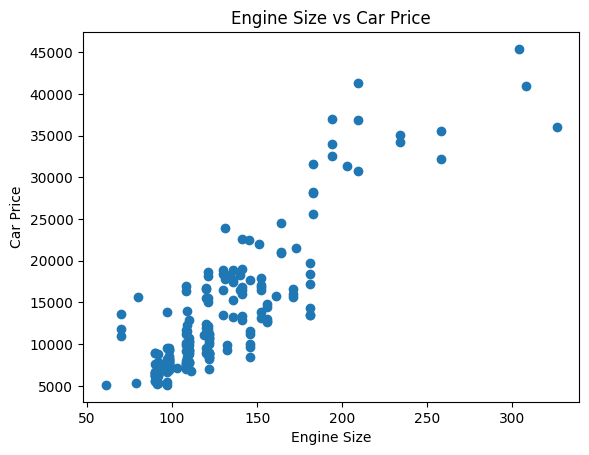

In [55]:
plt.figure()
plt.scatter(X, y)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Engine Size vs Car Price")
plt.show()


#### 📌 Observation

Small engines → slow price increase

Medium engines → sharp rise

Large engines → saturation

This confirms non-linear behavior.

## Task-6: Split the Dataset

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Task-7: Apply Polynomial Features

To model the curved relationship, we use degree = 2 (quadratic).

In [57]:
poly = PolynomialFeatures(degree=3, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


## Task-8 : Train the Polynomial Regression Model

In [58]:
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

## Train the Linear Regression Model 

In [59]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

## Task-9: Model Evaluation

In [60]:
y_pred = model.predict(X_test_poly)

print("Polynomial Regression Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Polynomial Regression R² Score:", r2_score(y_test, y_pred))

y_pred_linear = linear_model.predict(X_test)

print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_linear))
print("Linear Regression R²:", r2_score(y_test, y_pred_linear))



Polynomial Regression Mean Squared Error: 11621389.45510469
Polynomial Regression R² Score: 0.8527894915205758
Linear Regression MSE: 15465458.965908466
Linear Regression R²: 0.8040958796678975


## Task-10 : Visualize the Regression Curve

Polynomial Regression  Model Visualization

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


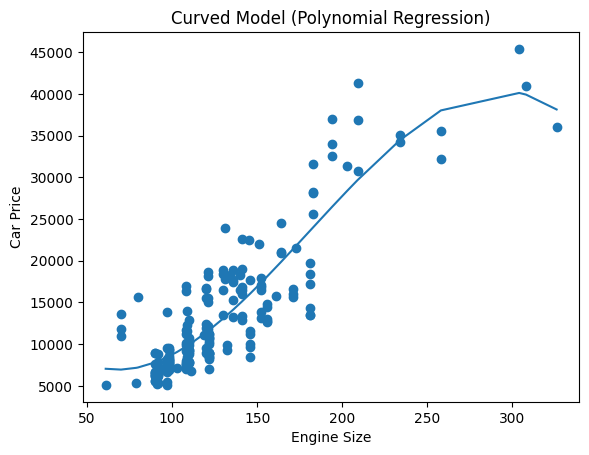

In [61]:
X_sorted = np.sort(X.values, axis=0)
X_sorted_poly = poly.transform(X_sorted)
y_sorted_pred = model.predict(X_sorted_poly)

plt.figure()
plt.scatter(X, y)
plt.plot(X_sorted, y_sorted_pred)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Curved Model (Polynomial Regression)")
plt.show()


Linear Model Visualization

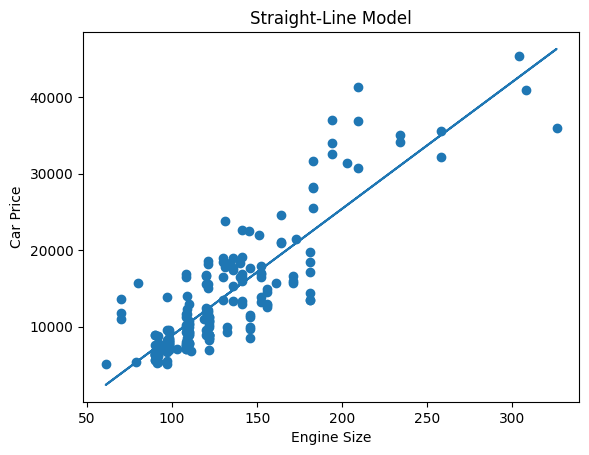

In [62]:
plt.figure()
plt.scatter(X, y)
plt.plot(X, linear_model.predict(X))
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Straight-Line Model")
plt.show()


## Taask-11 : Predict Price for Engine Size = 200

Linear Regression Model Prediction

In [63]:
linear_price_200 = linear_model.predict([[200]])
print("Linear Model Prediction (Engine Size 200):", linear_price_200[0])


Linear Model Prediction (Engine Size 200): 25427.147445039867


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Polynomial Model Prediction (Engine Size = 200)

In [64]:
poly_price_200 = model.predict(poly.transform([[200]]))
print("Polynomial Model Prediction (Engine Size 200):", poly_price_200[0])


Polynomial Model Prediction (Engine Size 200): 27760.60834545276


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


### ❓ Why does a straight-line model fail here?

Because price does not increase at a constant rate with engine size.

Market factors like performance demand and luxury saturation break linearity.

### ❓ What risk occurs if the curve becomes too flexible?

Overfitting

Model learns noise instead of true trend

Poor predictions for new engine sizes

### ❓ Which model would you recommend for production and why?

✅ Polynomial Regression (degree = 2)

Reasons:

Captures real-world pricing behavior

Lower prediction error

Balances flexibility and stability

Business-aligned and interpretable

#### Caluculating the metrics 

1) Linear Regression Metrics

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_linear = linear_model.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("LINEAR REGRESSION METRICS")
print("MAE :", mae_linear)
print("MSE :", mse_linear)
print("RMSE:", rmse_linear)
print("R²  :", r2_linear)


LINEAR REGRESSION METRICS
MAE : 2748.6947032901094
MSE : 15465458.965908466
RMSE: 3932.6147746643665
R²  : 0.8040958796678975


2) Polynomial Regression Metrics

In [66]:
y_pred_poly = model.predict(X_test_poly)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("POLYNOMIAL REGRESSION METRICS")
print("MAE :", mae_poly)
print("MSE :", mse_poly)
print("RMSE:", rmse_poly)
print("R²  :", r2_poly)


POLYNOMIAL REGRESSION METRICS
MAE : 2348.8434416448335
MSE : 11621389.45510469
RMSE: 3409.015907135766
R²  : 0.8527894915205758


📈 Metrics Comparison Table

In [67]:
metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression"],
    "MAE": [mae_linear, mae_poly],
    "RMSE": [rmse_linear, rmse_poly],
    "R² Score": [r2_linear, r2_poly]
})

metrics_df


,Model,MAE,RMSE,R² Score
0,Linear Regression,2748.694703,3932.614775,0.804096
1,Polynomial Regression,2348.843442,3409.015907,0.852789


In [68]:
poly_xtrain_predict = model.predict(X_train_poly)
px_score = r2_score(y_train, poly_xtrain_predict)
print("Polynomial Regression R² on Training Data:", px_score)

Polynomial Regression R² on Training Data: 0.7730035936067178


## 🔍 RELATIONSHIP ANALYSIS FOR EACH COLUMN

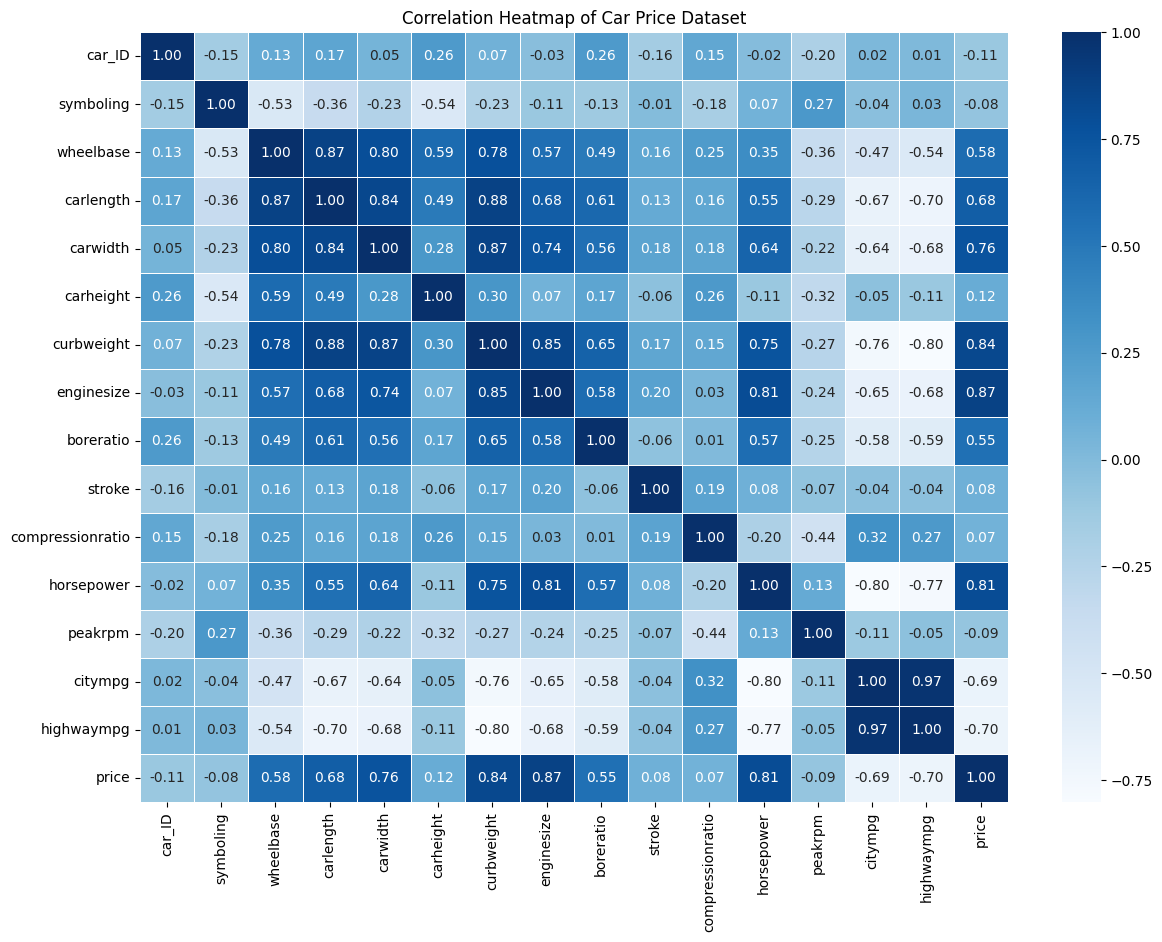

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="Blues",   # ✅ Correct cmap
    linewidths=0.5
)
plt.title("Correlation Heatmap of Car Price Dataset")
plt.show()


## Relationship Analysis of Each Column

15 numerical values except target(price)

### Strong: |correlation| ≥ 0.70

### Moderate: 0.40 ≤ |correlation| < 0.70

### Weak: |correlation| < 0.40

---------------------------------------------------------
1) enginesize=+0.87 -Strong Positive
2) car_ID = −0.11 - Weak Negative
3) symboling = −0.08 → Weak Negative
4) wheelbase = +0.58 → Moderate Positive
5) carlength = +0.68 → Moderate Positive
6) carwidth = +0.76 → Strong Positive
7) carheight = +0.12 → Weak Positive
8) curbweight = +0.84 → Strong Positive
9) enginesize = +0.87 → Strong Positive
10) boreratio = +0.55 → Moderate Positive
11) stroke = +0.08 → Weak Positive
12) compressionratio = +0.07 → Weak Positive
13) horsepower = +0.81 → Strong Positive
14) peakrpm = −0.09 → Weak Negative
15) citympg = −0.69 → Strong Negative

## Feature to Target (weak and less than 0.1)
symboling , 
peakrpm , 
stroke , 
compressionratio .

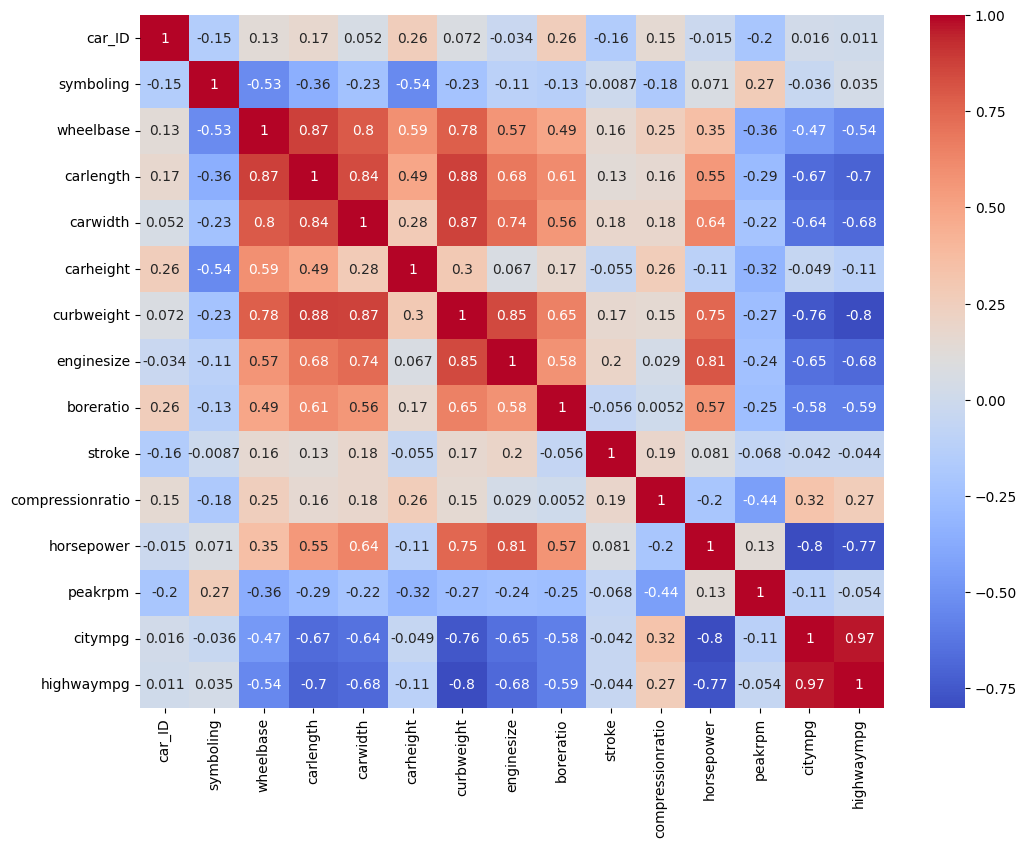

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

x=df.drop('price',axis=1)

plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True) , annot=True,cmap='coolwarm')
plt.show()
 
# Featue to Target 


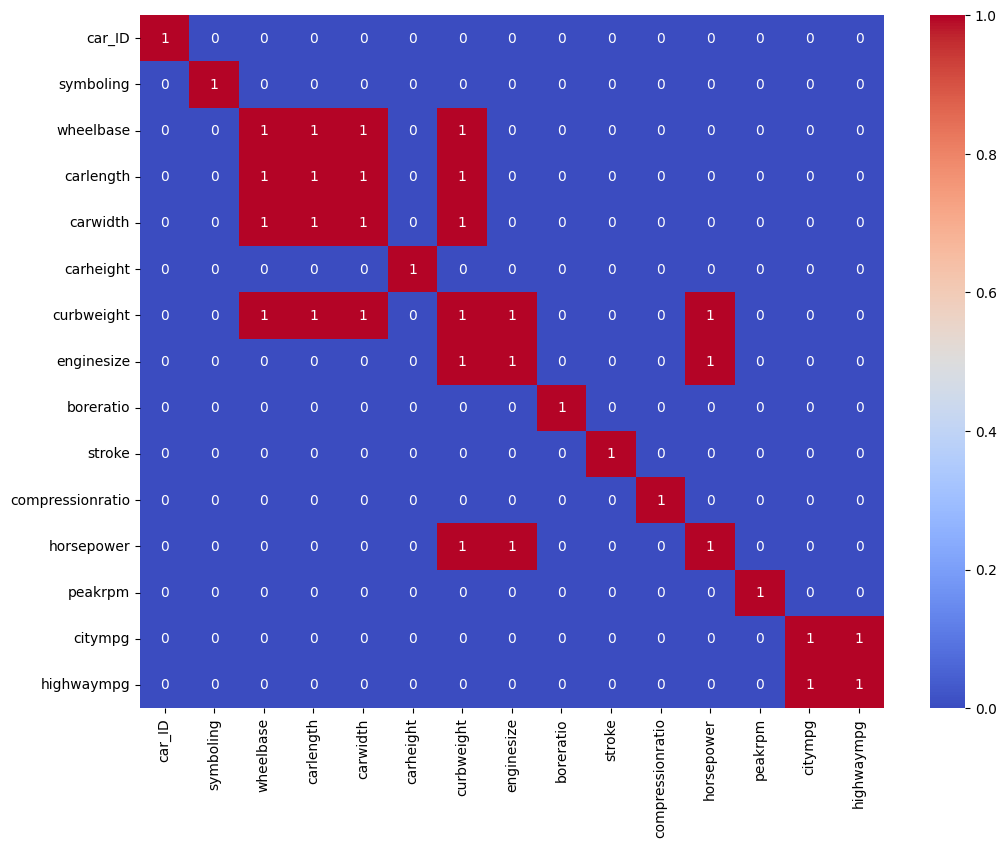

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

x=df.drop('price',axis=1)

plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True) > 0.75, annot=True,cmap='coolwarm')
plt.show()
 
# Featue to Feature relationship > 0.75 


Feature     -    Feature ( 10 unique pairs)

wheelbase-->carlength(0.87)
 
wheelbase-->carwidth(0.8)
 
wheelbase-->curbweight(0.78)
 
carlength-->carwidth(0.84)
 
carlength-->curbweight(0.88)
 
carwidth-->curbweight(0.87)
 
curbweight-->enginesize(0.85)
 
curbweight-->horsepower(0.75)
 
enginesize-->horsepower(0.81)
 
citympg-->highwaympg(0.97)


Unique columns are :-

wheelbase

carlength

carwidth

curbweight

enginesize

horsepower

citymgp

highwaympg

## Feature to Target Correlation

wheelbase - price = 0.58

carlength - price = 0.68

carwidth - price = 0.76

curbweight - price = 0.84

enginesize - price = 0.87

horsepower - price = 0.81

citympg - price = -0.69

highwaympg - price = -0.70

## Features to drop 

Values less than 0.1 := symboling , peakrpm , stroke , compressionratio .

Values greater than 0.75 and need to remove := none 


In [72]:
# List of columns to remove
columns_to_drop = [
    'symboling',
    'peakrpm',
    'stroke',
    'compressionratio'
    ]

# Drop columns
df_reduced = df.drop(columns=columns_to_drop, axis=1)

# Verify
print("Remaining columns:")
print(df_reduced.columns)


Remaining columns:
Index(['car_ID', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
